<a href="https://colab.research.google.com/github/AflaRishad/CSD415/blob/main/Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

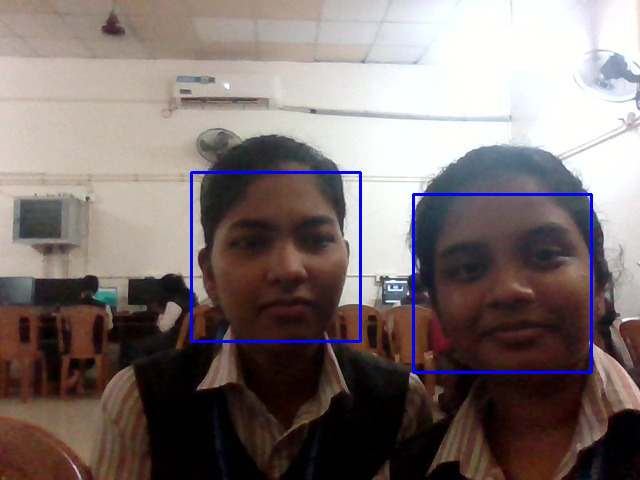

In [ ]:
# Install OpenCV
!pip install opencv-python-headless

# Import libraries
import cv2
import numpy as np
import base64
from google.colab.output import eval_js
from IPython.display import Javascript, display
from google.colab.patches import cv2_imshow

# Webcam capture using JS
def take_photo():
  display(Javascript('''
    async function takePhoto() {
      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({ video: true });
      video.srcObject = stream;
      await video.play();
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(t => t.stop());
      return canvas.toDataURL('image/jpeg');
    }
    takePhoto();
  '''))
  data = eval_js('takePhoto()')
  img_bytes = base64.b64decode(data.split(',')[1])
  return cv2.imdecode(np.frombuffer(img_bytes, np.uint8), -1)

# Load image
img = take_photo()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load face detector
face = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect face
faces = face.detectMultiScale(gray, 1.1, 4)

# Draw rectangle
for (x, y, w, h) in faces:
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Show result
cv2_imshow(img)
